In [ ]:
!wget https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg

--2022-02-09 14:16:16--  https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 184.31.10.237, 2600:1480:4000:e5::
Connecting to pbs.twimg.com (pbs.twimg.com)|184.31.10.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118931 (116K) [image/jpeg]
Saving to: ‘E167M0tWQAgC23h.jpg’

E167M0tWQAgC23h.jpg 100%[===================>] 116.14K  --.-KB/s    in 0.007s  

2022-02-09 14:16:16 (15.2 MB/s) - ‘E167M0tWQAgC23h.jpg’ saved [118931/118931]



In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
IMG_PATH = 'E167M0tWQAgC23h.jpg'

# Считывание изображений

Считать изображение с диска можно с помощью функции imread:

In [ ]:
img = cv2.imread(IMG_PATH)

отобразим изображение:

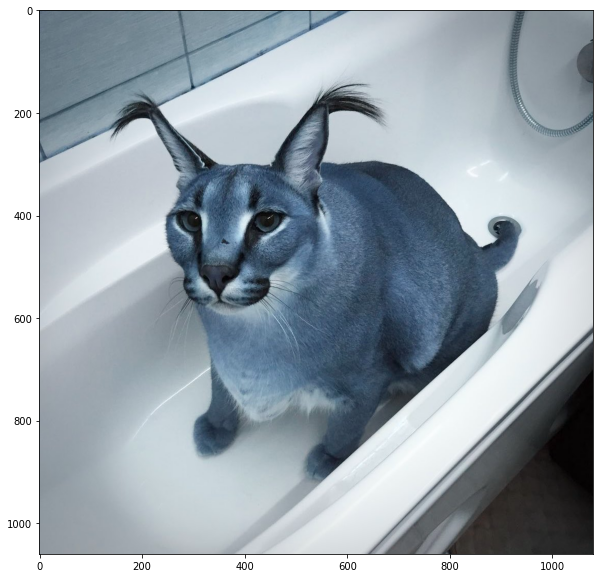

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img)

Как видно, цвета изображения неправильные. Это потому, что функция imread считывает изображения в формате BGR (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

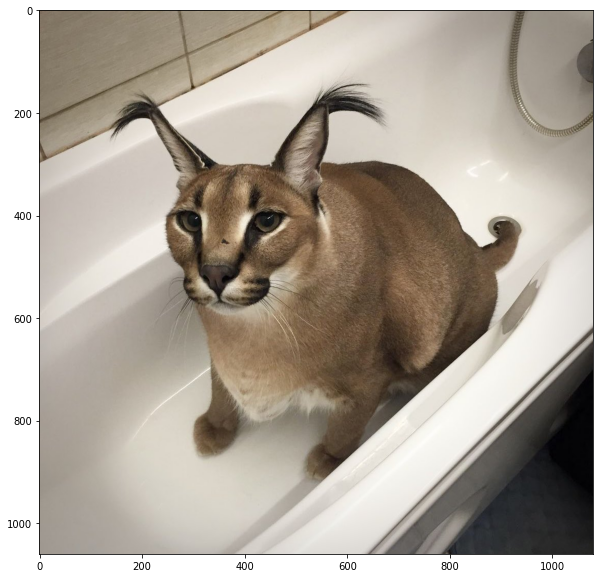

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

# Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями, каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов (RGB: 0 - красный, 1 - зеленый, 2 - синий):

In [ ]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (1060, 1080, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [ ]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  152.95307389937108
img_rgb.std() =  62.74586185757183
np.median(img_rgb) =  164.0


присвоить какое-либо значение блоку(пикселю):

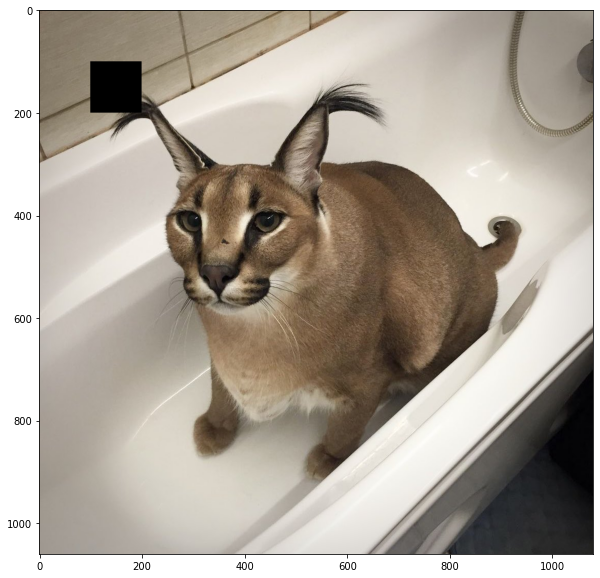

In [ ]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_2)

прибавить какое-либо значение блоку(пикселю):

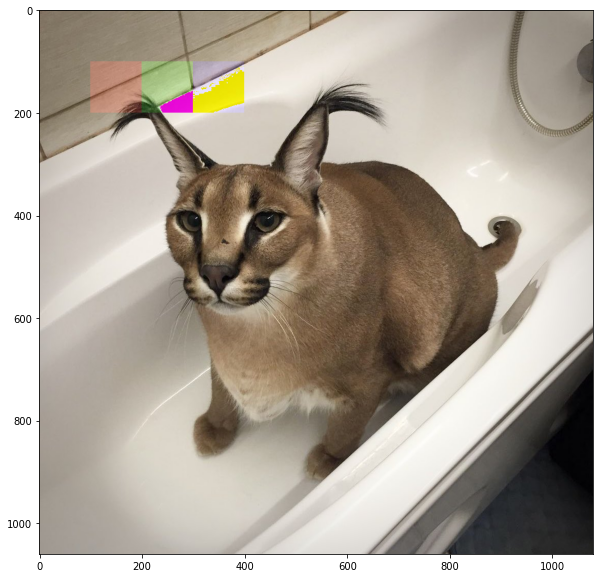

In [ ]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_3)

## Вопрос 1

Что произошло с цветами на изображении img_rgb_2? Почему так произошло?

**Ответ:**
У соответственных кусочков увелчили интенсивность соответственных цветов

## Упражнение 1 BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [ ]:
def convert_color_bgr_to_rgb(img_bgr):
    return img_bgr[:,:,::-1]

In [ ]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

## Упражнение 2 Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:
$$
f'(x, y) = \alpha f(x, y) + \beta
$$

В данном упражнении необходимо реализовать это преобразование, а также исследовать работу при различных значениях параметров. Какую физическую интерпретацию можно дать этому преобразованию?

In [ ]:
def change_intensity(img, alpha=1, beta=0):
    
    return np.round(np.clip(img * alpha + beta, a_min=0, a_max=255))

In [ ]:
alpha = 1.8
beta = 10

img_out_cv = np.zeros_like(img_rgb)
cv2.convertScaleAbs(img_rgb, img_out_cv, alpha, beta)

img_out_my = change_intensity(img_rgb, alpha, beta)

assert((img_out_cv == img_out_my).all())

## Упражнение 3 Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию и продеменстрируйте ее работу на примере. Изображения можно загрузить так же, как это сделано в начале тетрадки.

Приведите примеры, для каких задач может понадобиться данная операция. 

Как она может быть обобщена на большее количество изображений? Выпишите формулу.

In [ ]:
!wget https://avatars.mds.yandex.net/i?id=613c38850b458150ce6daee1662bf668-5544440-images-thumbs&n=13&exp=1

--2022-02-09 14:16:30--  https://avatars.mds.yandex.net/i?id=613c38850b458150ce6daee1662bf668-5544440-images-thumbs
Resolving avatars.mds.yandex.net (avatars.mds.yandex.net)... 87.250.247.182, 87.250.247.181, 87.250.247.184, ...
Connecting to avatars.mds.yandex.net (avatars.mds.yandex.net)|87.250.247.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5094 (5.0K) [image/jpeg]
Saving to: ‘i?id=613c38850b458150ce6daee1662bf668-5544440-images-thumbs’

i?id=613c38850b4581 100%[===================>]   4.97K  --.-KB/s    in 0s      

2022-02-09 14:16:30 (644 MB/s) - ‘i?id=613c38850b458150ce6daee1662bf668-5544440-images-thumbs’ saved [5094/5094]



In [ ]:
imgnew = cv2.resize(cv2.cvtColor(cv2.imread('i?id=613c38850b458150ce6daee1662bf668-5544440-images-thumbs'), cv2.COLOR_BGR2RGB), (img_rgb.shape[1], img_rgb.shape[0]))

In [ ]:
def mix(im1,im2, alpha):
   return np.round(np.clip((im1*(1-alpha)+ im2 *alpha), a_min=0, a_max=255)).astype('uint8')

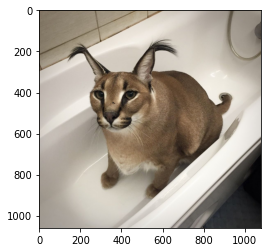

In [ ]:
plt.imshow(img_rgb)

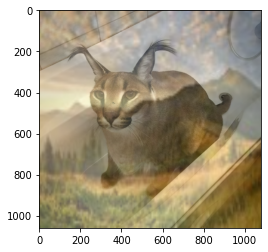

In [ ]:
plt.imshow(mix(img_rgb, imgnew,0.5))

# Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [ ]:
TEXT = 'Shlepa 0.99'
UL_CORNER = (250, 300)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 3               # размер
COLOR = (255, 0, 0)     # цвет - красный
THICKNESS = 5           # толшина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (550, 600), COLOR, THICKNESS)
None

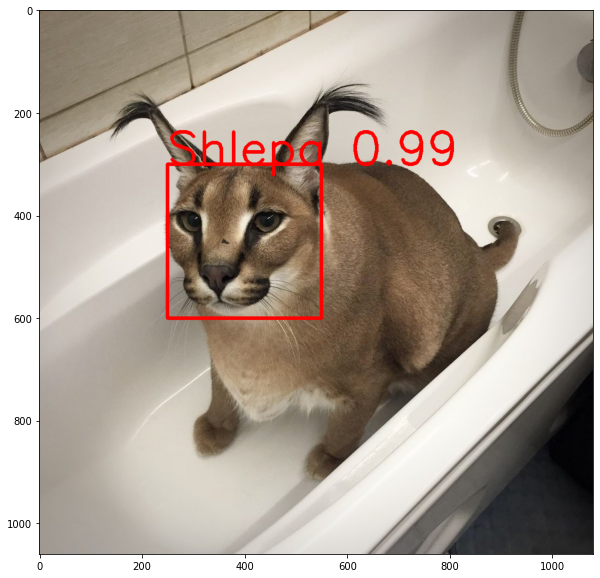

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_4)

## Вопрос 2

Зачем может понадобиться рисовать на изображении?

**Ответ**:
Вандализм, сегментация

# Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](https://gadget-news.net/wp-content/uploads/2019/12/slide-16.jpg)

OpenCV позволяет преобразовывать такие изображения в привычные трехканальные изображения. Этот процесс называется дебайеризация или демозаикинг.


## Вопрос 3

Почему на фильтре Байера зеленых пикселей в 2 раза больше чем синих или красных? Можно ли сделать иначе?

**Ответ:**
Связано с тем, что потеря зеленого цвета критичнее и для человека важнее именно зеленый цвет

## Упражнение

Преобразуйте RGB изображение в байеризованное, как на картинке выше, разделив три канала на четыре смежных пикселя

In [ ]:
def rgb_to_bayer(img_rgb):
    (height, width) = img_rgb.shape[:2]
    (R,G,B) = cv2.split(img_rgb)

    bayer = np.empty((height, width), np.uint8)
    bayer[0::2, 0::2] = B[0::2, 0::2]
    bayer[0::2, 1::2] = G[0::2, 1::2]
    bayer[1::2, 0::2] = G[1::2, 0::2]
    bayer[1::2, 1::2] = R[1::2, 1::2]
    return bayer

посмотрим на кусочек изображения вблизи:

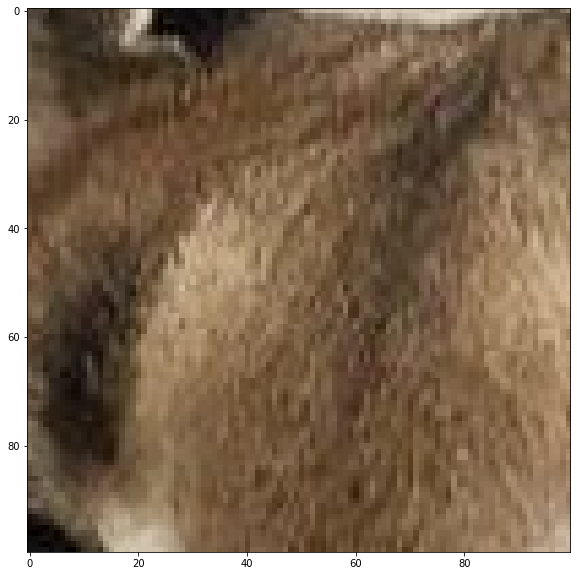

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb[300:400, 300:400])

Получим его байеризованную версию:

In [ ]:
img_bayer = rgb_to_bayer(img_rgb)

Байеризованное изображение должно содержать характерный мазайчный узор:

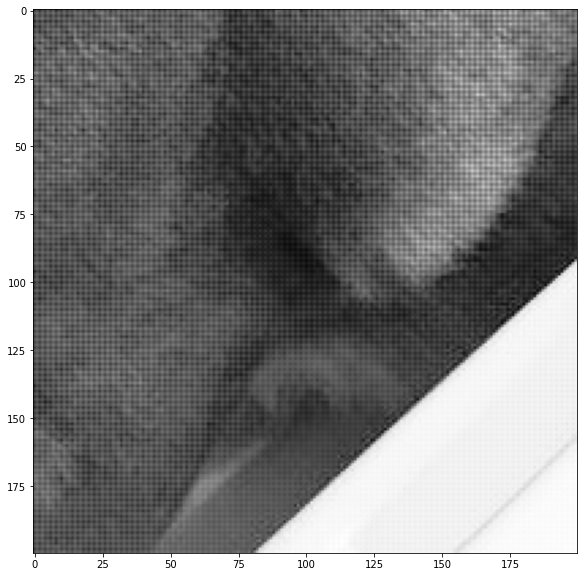

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_bayer[600:800, 600:800], cmap='Greys_r')

Для дебайеризации можно воспользоваться функцией из OpenCV:

In [ ]:
img_debayer = cv2.cvtColor(img_bayer, cv2.COLOR_BAYER_RG2RGB)

Если все сделано верно, то дебайеризованное изображение будет похоже на исходное. Однако точного совпадения не будет. Попытайтесь предположить, почему?

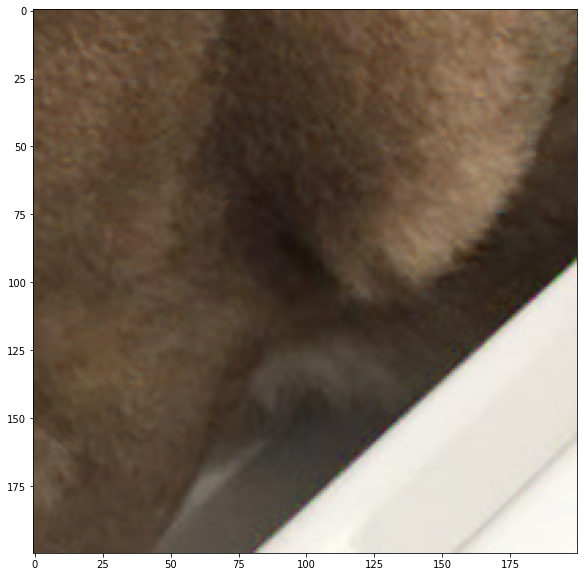

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_debayer[600:800, 600:800])

# Сжатие/расжатие изображений

Изображения в формате JPEG являются сжатыми изображениями и на диске могут занимать существенно меньше места, чем после загрузки в оперативную память. Чтобы загрузить изображения в сжатом формате, можно просто прочитать файл в бинарном режиме:

In [ ]:
with open(IMG_PATH, 'rb') as f:
    img_bytes = f.read()

In [ ]:
print('type(img_bytes) = ', type(img_bytes))

type(img_bytes) =  <class 'bytes'>


Считанные данные нужно преобразовать в массив байт для возможности дальнейшего расжатия:

In [ ]:
img_buf = np.asarray(bytearray(img_bytes), dtype=np.uint8)

In [ ]:
img_buf.shape, img_buf.dtype

((118931,), dtype('uint8'))

In [ ]:
img_buf_size = np.array(img_buf.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_size / 1024 / 1024))

Размер сжатого изображения: 0.113 МБ


Как видим, в сжатом виде изображение занимает мало места и в оперативной памяти. Разожмем его с помощью средств OpenCV:

In [ ]:
img = cv2.imdecode(img_buf, cv2.IMREAD_COLOR)

In [ ]:
img.shape, img.dtype

((1060, 1080, 3), dtype('uint8'))

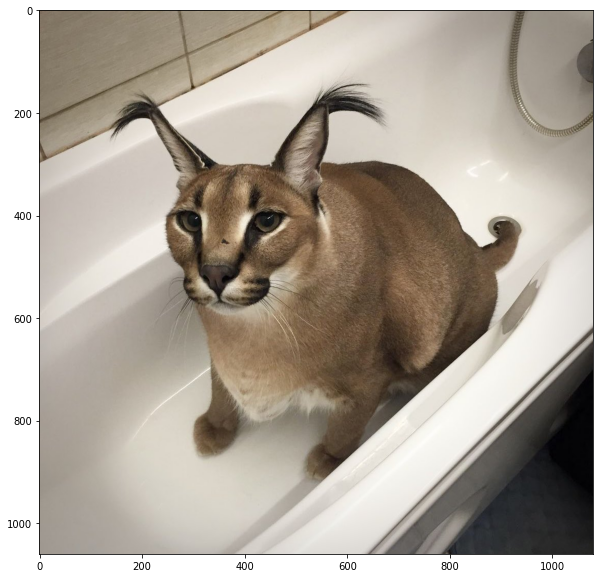

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img[:, :, ::-1])

In [ ]:
img_size = np.array(img.shape).prod()
print('Размер изображения: {:.3f} МБ'.format(img_size / 1024 / 1024))

Размер изображения: 3.275 МБ


Как видим в несжатом представлении изображение занимает существенно больше памяти. Рассчитаем коэффициент сжатия:

In [ ]:
print('Коэффициент сжатия: {:.1f}'.format(img_size / img_buf_size))

Коэффициент сжатия: 28.9


Изображение можно сжать обратно следующим образом:

In [ ]:
ok, img_buf_2 = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10))

In [ ]:
img_buf_2_size = np.array(img_buf_2.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_2_size / 1024 / 1024))

Размер сжатого изображения: 0.027 МБ


Алгоритм сжатия определяется указанным расширением, кроме того имеет различные параметры: https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_ImwriteFlags.html. Наиболее используемым является качество сжатия.

Декодируем сжатое с качеством 10 изображение:

In [ ]:
img_2 = cv2.imdecode(img_buf_2, cv2.IMREAD_COLOR)

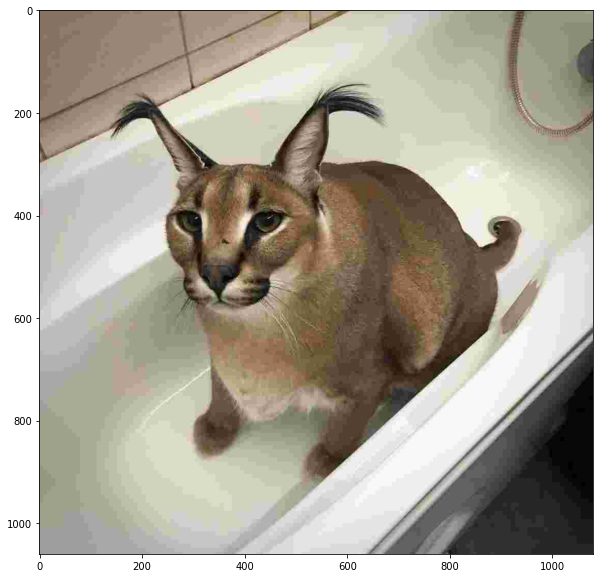

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_2[:, :, ::-1])

## Вопрос 4

Зачем может понадобиться хранить в оперативной памяти сжатые изображения?

Промежуточные датасеты, отправка файлов, экономия памяти